# Life expectancy and GDP

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\dvale\Life_Expectancy_and_GDP\life_gdp.csv')

### Introduction

The goal of this project is to explore the relationship between the GDP of a country and its life expectancy.

The following dataset presents data on GDP and life expectancy from the World Health Organization and the World Bank. The data is limited to six different countries for each year between 2000 and 2015. The selected countries include two high income economies (Germany and the United States), three middle income economies (Chile, Mexico and China) and one developing economy (Zimbabwe). The conclusions of this projects will be based on the insights provided by this dataset.

In [4]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [6]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

### Life expectancy by country

Life expectancy increased in every country during the first 15 years of the new millenium. Growth was moderate in the high to middle income countries. In contrast Zimbabwe grew at a remarkable pace starting from 2004 onwards, increasing its life expectancy relative to the year 2000 by a third.

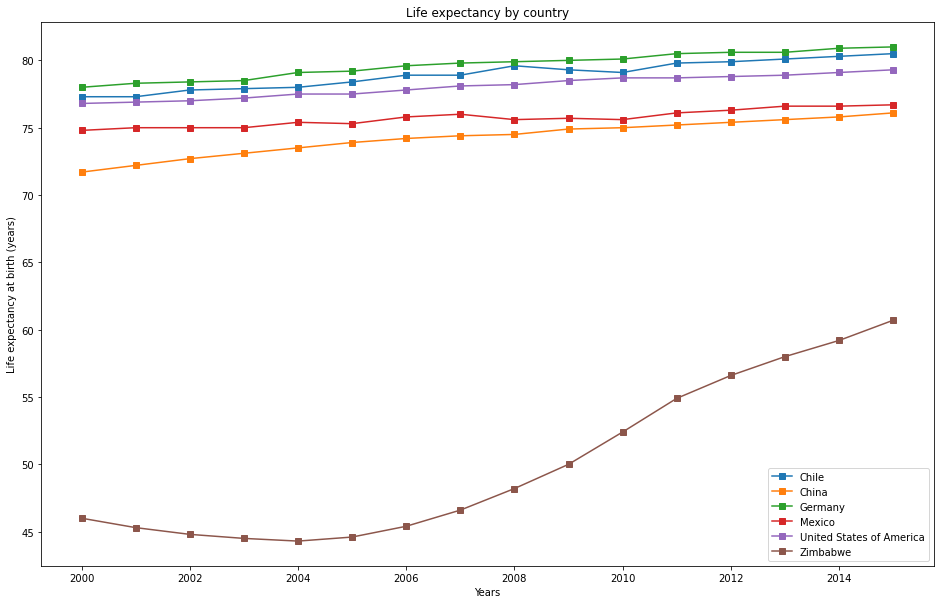

In [7]:
countries = df.Country.unique()
years = df.Year.unique()

plt.figure(figsize=(16, 10))
plt.title('Life expectancy by country')
plt.xlabel('Years')
plt.ylabel('Life expectancy at birth (years)')
for country in countries:
    life_expectancy = df[df.Country == country]['Life expectancy at birth (years)']
    plt.plot(years, life_expectancy, marker='s', label=country)
    plt.legend();

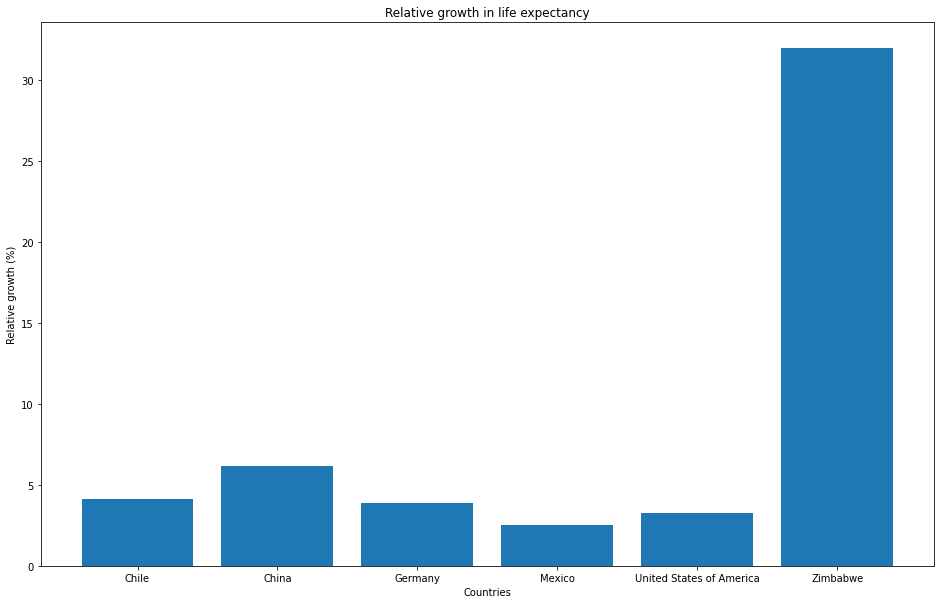

In [8]:
#Storing the life expectancy for each country by the begining of the time series
first_year_life_expectancy = []
for country in countries:
    filtred_country = df[df.Country == country]
    filtred_year = filtred_country[filtred_country.Year == years[0]]['Life expectancy at birth (years)']
    num = filtred_year.values.tolist()[0]
    first_year_life_expectancy.append(num)
#Storing the life expectancy for each country by by the end of the time series
last_year_life_expectancy = []
for country in countries:
    filtred_country = df[df.Country == country]
    filtred_year = filtred_country[filtred_country.Year == years[-1]]['Life expectancy at birth (years)']
    num = filtred_year.values.tolist()[0]
    last_year_life_expectancy.append(num)
#Calculating the relative growth for each country between both years.
relative_growth_life_expectancy = [(((last_year_life_expectancy[i]/first_year_life_expectancy[i])-1)*100)
                   for i in range(len(countries))]

plt.figure(figsize=(16, 10))
ax = plt.subplot()
plt.title('Relative growth in life expectancy')
plt.xlabel('Countries')
plt.ylabel('Relative growth (%)')
xticks = range(len(countries))
plt.bar(xticks, relative_growth_life_expectancy)
ax.set_xticks(xticks)
ax.set_xticklabels(countries);

### GDP by Country

The US and China led in total economic growth. However relative to their starting size the US did not perform better than the other countries. The US, Germany and Mexico fell short of doubling their size, whereas Zimbabwe and Chile were succesfull in  reaching well beyond that. China's relative growth was the most remarkable at 800% its former size.

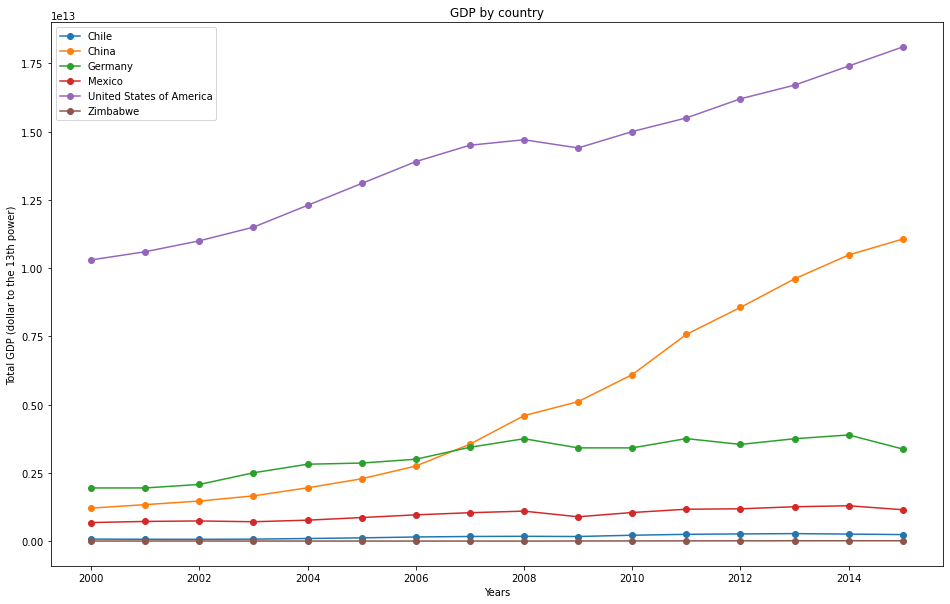

In [7]:
plt.figure(figsize=(16, 10))
plt.title('GDP by country')
plt.xlabel('Years')
plt.ylabel('Total GDP (dollar to the 13th power)')
for country in countries:
    gdp = df[df.Country == country].GDP
    plt.plot(years, gdp, marker='o', label=country)
    plt.legend();

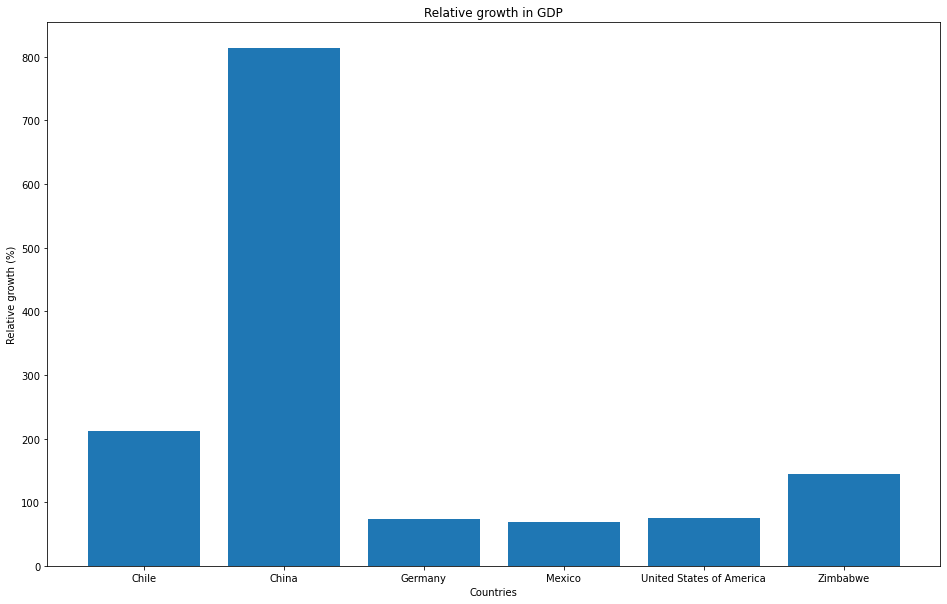

In [9]:
first_year_gdp = []
for country in countries:
    filtred_country = df[df.Country == country]
    filtred_year = filtred_country[filtred_country.Year == years[0]].GDP
    num = filtred_year.values.tolist()[0]
    first_year_gdp.append(num)

last_year_gdp = []
for country in countries:
    filtred_country = df[df.Country == country]
    filtred_year = filtred_country[filtred_country.Year == years[-1]].GDP
    num = filtred_year.values.tolist()[0]
    last_year_gdp.append(num)

relative_growth_gdp = [round((((last_year_gdp[i]/first_year_gdp[i])-1)*100),2)
                   for i in range(len(countries))]

plt.figure(figsize=(16, 10))
ax = plt.subplot()
plt.title('Relative growth in GDP')
plt.xlabel('Countries')
plt.ylabel('Relative growth (%)')
xticks = range(len(countries))
plt.bar(xticks, relative_growth_gdp)
ax.set_xticks(xticks)
ax.set_xticklabels(countries);

### Life expectancy in relation with GDP by Country

Life expectancy seems to be growing with GDP. Linear correlations are found in all countries (although in the case of China it looks a bit exponential). The relationships seems to vary depending on the country. Zimbabwe strong increase in life expectancy contrasts its more modest GDP growth. This might be explained by increasing access to medical advances which can contribute to accelerated improvements in life conditions. China on the other has experienced strong economic growth and a slowdown in life expectancy growht rate. This slowdown could maybe be explained by the reach of a tipping point in which modern medical advances can no longer push it up so aggresively.

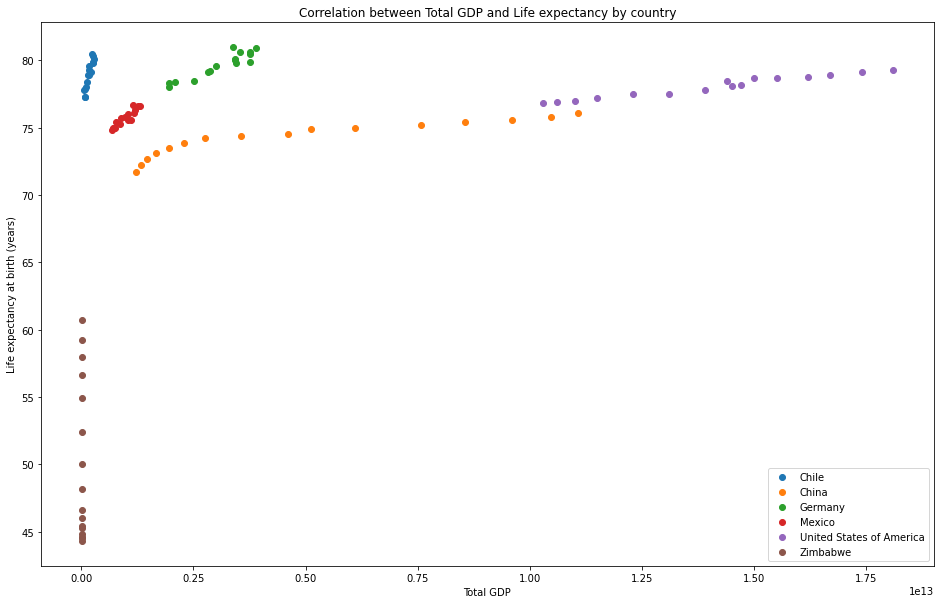

In [102]:
plt.figure(figsize=(16, 10))
plt.title('Correlation between Total GDP and Life expectancy by country')
plt.xlabel('Total GDP')
plt.ylabel('Life expectancy at birth (years)')
for country in countries:
    gdp = df[df.Country == country].GDP
    life_expectancy = df[df.Country == country]['Life expectancy at birth (years)']
    plt.scatter(gdp, life_expectancy, label=country)
    plt.legend();

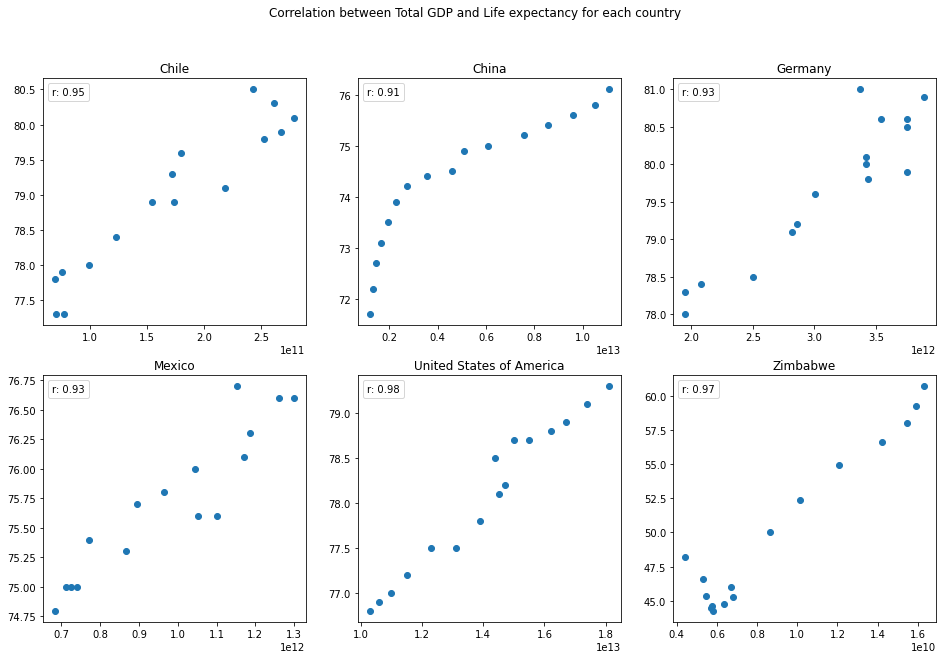

In [105]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Correlation between Total GDP and Life expectancy for each country')
subplot = 1
for country in countries:
    gdp = df[df.Country == country].GDP
    life_expectancy = df[df.Country == country]['Life expectancy at birth (years)']
    #Calculating the Pearson coeficient for each correlation.
    pearson = gdp.corr(life_expectancy, 'pearson')
    ax = plt.subplot(2, 3, subplot)
    ax.title.set_text(country)
    #Showing the coeficient in the legend.
    ax.scatter(gdp, life_expectancy, label='r: ' + str(pearson.round(2)))
    #Showing JUST the coeficient by hiding the legend handles, setting their size to 0 and removing their padding.
    leg = ax.legend(handlelength=0, handletextpad=0, loc='upper left')
    for item in leg.legendHandles:
        item.set_visible(False)
    subplot += 1

### Conclusions

Life expectancy and GDP seem to be positively correlated. Economic growth and life expectancy are both indicators of development. However that does not mean they have to necesarily increase at the same pace. Global advances in medicine might drive up life expectancy everywhere up to a certain point. Economic growth on the other hand is more dependant on the specific circunstances of each country.